In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = 'drive/MyDrive/dataset'

**1. Import and warehouse data:**
* Import all the given datasets from MYSQL server. Explore shape and size.
* Merge all datasets onto one and explore final shape and size.

In [5]:
data = pd.read_csv(path+'/TelcomCustomer-Churn.csv')

In [ ]:
data.head()

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.size

147903

In [ ]:
data.tail()

In [ ]:
data.info()

**2. Data cleansing:**
* Missing value treatment
* Convert categorical attributes to continuous using relevant functional knowledge
* Drop attribute/s if required using relevant functional knowledge
* Automate all the above steps

In [12]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**converting the object dtype to category**

In [13]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors="coerce")
data.TotalCharges.astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
b = data[data['TotalCharges'].isnull()].index.tolist()
b

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [ ]:
bool_series = pd.isnull(data["TotalCharges"])
data[bool_series]

In [17]:
data = data.dropna()

In [18]:
data.shape

(7032, 21)

In [19]:
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = pd.Categorical(data[i])


In [20]:
data1 = data

In [22]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [25]:
for i in data.columns:
  if data[i].dtype.name ==  'category':
    print(data[i].value_counts())

9995-HOTOH    1
3372-KWFBM    1
3351-NQLDI    1
3352-ALMCK    1
3352-RICWQ    1
             ..
6625-IUTTT    1
6625-UTXEW    1
6627-CFOSN    1
6629-CZTTH    1
0002-ORFBO    1
Name: customerID, Length: 7032, dtype: int64
Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: in

In [26]:
replaceStruct = { 'gender':{'Male':1,'Female':0},
                  'PaperlessBilling':{'Yes':1,'No':0},
                  'Contract':{'Month-to-month':0,'One year':1,'Two year':2},
                  'StreamingMovies':{'No':0,'Yes':1,'No internet service':2},
                  'StreamingTV':{'No':0,'Yes':1,'No internet service':2},
                  'TechSupport':{'No':0,'Yes':1,'No internet service':2},
                  'DeviceProtection':{'No':0,'Yes':1,'No internet service':2},
                  'OnlineBackup':{'No':0,'Yes':1,'No internet service':2},
                  'OnlineSecurity':{'No':0,'Yes':1,'No internet service':2},
                  'InternetService':{'No':0,'DSL':1,'Fiber optic':2},
                  'MultipleLines':{'No phone service':0,'Yes':1,'No':2},
                  'PhoneService':{'No':0,'Yes':1},
                  'Dependents':{'Yes':1,'No':0},
                  'Partner':{'Yes':1,'No':0},
                  'Churn': {'Yes':1,'No':0}
                 }


In [27]:
data = data.replace(replaceStruct)

In [ ]:
data

In [29]:
one_hot_col = ['PaymentMethod']

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   int64   
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   int64   
 4   Dependents        7032 non-null   int64   
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   int64   
 7   MultipleLines     7032 non-null   int64   
 8   InternetService   7032 non-null   int64   
 9   OnlineSecurity    7032 non-null   int64   
 10  OnlineBackup      7032 non-null   int64   
 11  DeviceProtection  7032 non-null   int64   
 12  TechSupport       7032 non-null   int64   
 13  StreamingTV       7032 non-null   int64   
 14  StreamingMovies   7032 non-null   int64   
 15  Contract          7032 non-null   int64   
 16  PaperlessBilling  7032 n

In [32]:
data = pd.get_dummies(data,columns = one_hot_col)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   category
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   int64   
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   InternetService                          7032 non-null   int64   
 9   OnlineSecurity                           7032 non-null   int64   
 10  OnlineBackup                        

In [34]:
data.drop('customerID',axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   InternetService                          7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

**3. Data analysis & visualisation:**
* Perform detailed statistical analysis on the data.
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [36]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,1.384670,0.655867,0.00,1.0000,1.000,2.0000,2.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00
OnlineSecurity,7032.0,0.718857,0.796556,0.00,0.0000,1.000,1.0000,2.00
OnlineBackup,7032.0,0.777162,0.778188,0.00,0.0000,1.000,1.0000,2.00


**Univariate Analysis**
* Below analysis is by using copied dataframe data to data1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


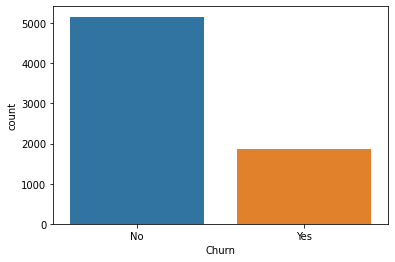

In [ ]:
sns.countplot(data1['Churn'])

In [28]:
Churn_True = data1["Churn"][data1["Churn"] == 'Yes']
print ("Churn Percentage = "+str( (Churn_True.shape[0] / data1["Churn"].shape[0]) * 100 ))

Churn Percentage = 26.578498293515356


**Conclusion:**
* Data is imbalanced
* Churn Yes category is 26%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


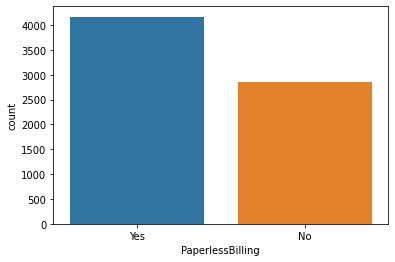

In [ ]:
 sns.countplot(data1['PaperlessBilling'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


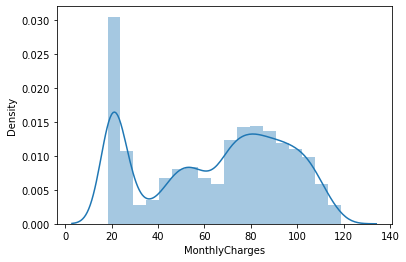

In [ ]:
sns.distplot(data1['MonthlyCharges'])

Above histogram is bimodal in nature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


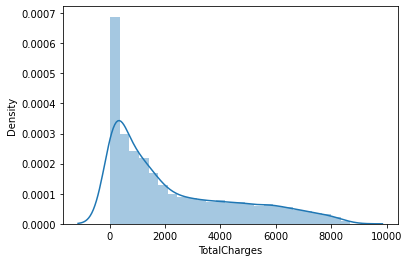

In [ ]:
sns.distplot(data1['TotalCharges'])

**Bivariate Analysis**

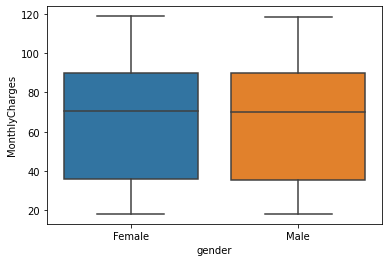

In [ ]:
sns.boxplot(x ='gender', y ='MonthlyCharges', data = data1)

In [ ]:
pd.crosstab(data1['gender'], data1['Churn'])

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [ ]:
pd.crosstab(data1['PaymentMethod'], data1['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [ ]:
pd.crosstab(data1['Partner'], data1['Churn'])

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [ ]:
pd.crosstab(data1['PaymentMethod'], data1['Churn'])

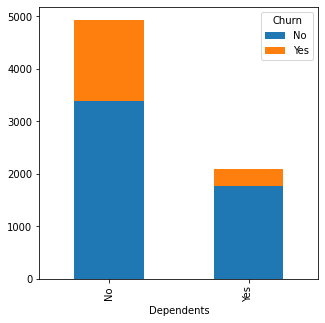

In [ ]:
data1.groupby(["Dependents", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

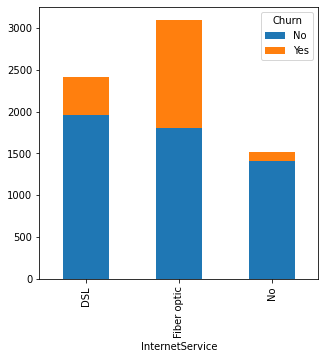

In [ ]:
data1.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

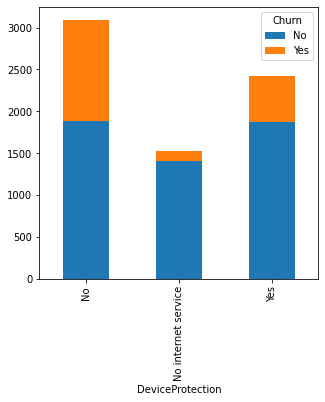

In [ ]:
data1.groupby(["DeviceProtection", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

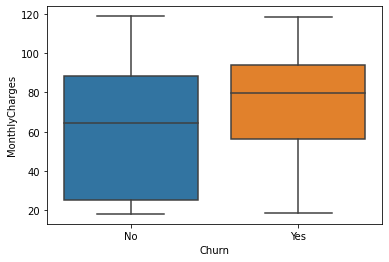

In [ ]:
sns.boxplot(x='Churn',y = 'MonthlyCharges', data = data1)
plt.show()

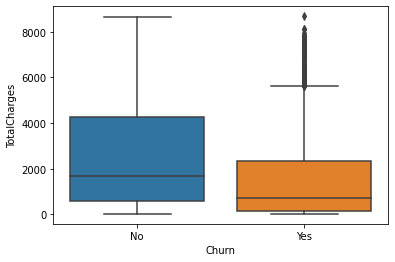

In [ ]:
sns.boxplot(x='Churn',y = 'TotalCharges', data = data1)
plt.show()

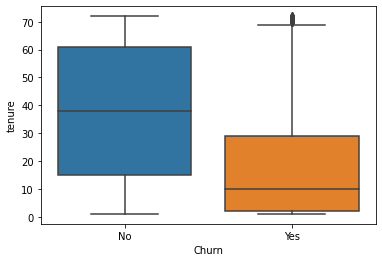

In [ ]:
sns.boxplot(x='Churn',y = 'tenure', data = data1)
plt.show()

**Multivariate Analysis**

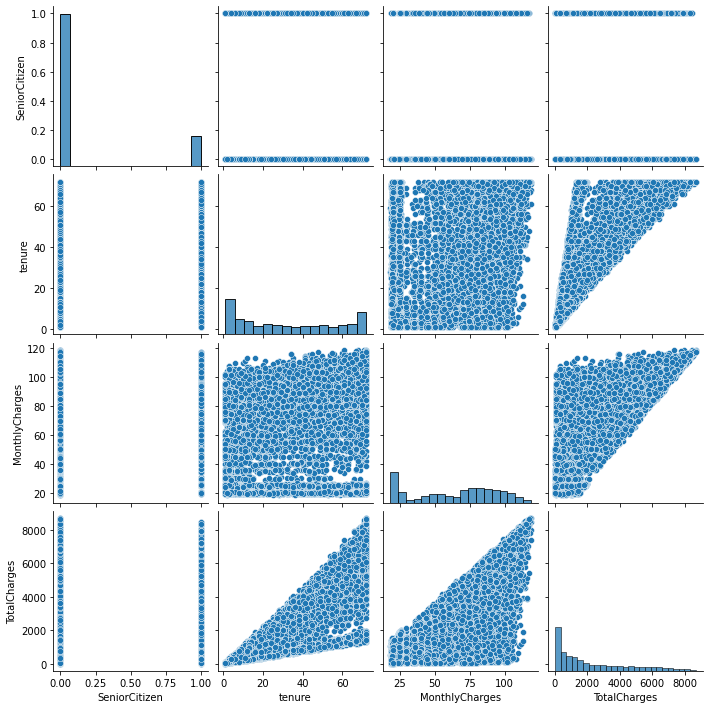

In [ ]:
sns.pairplot(data1)

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [ ]:
data1.shape

(7032, 21)

In [ ]:
data.shape

(7032, 23)

* Dataframe with name data contains the one hot encoding dummy columns

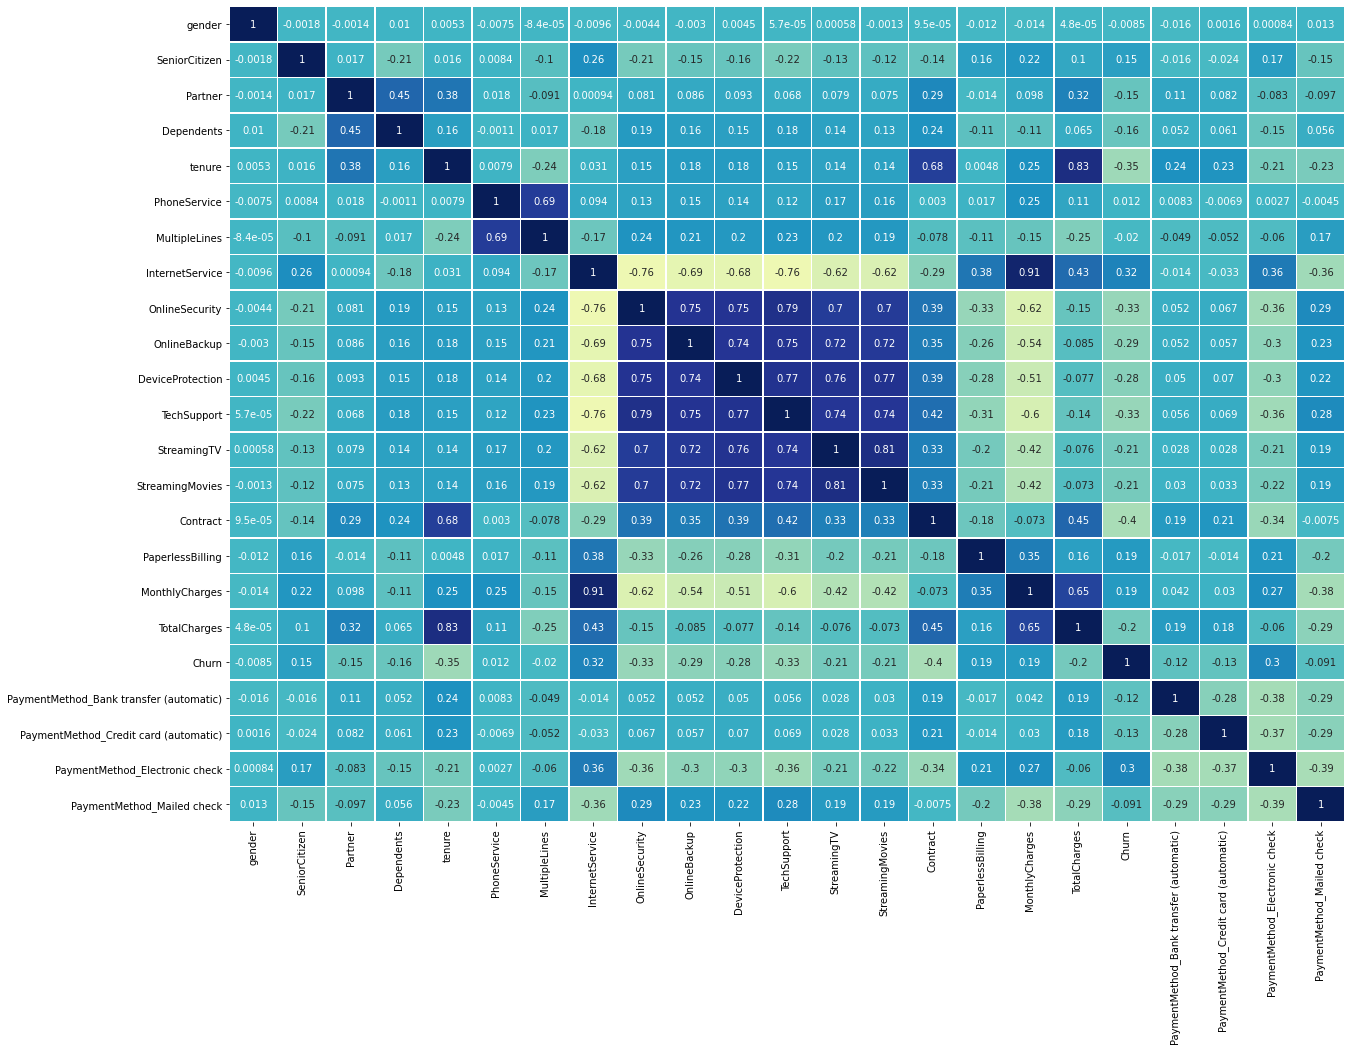

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,2,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,2,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,2,2,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0


In [ ]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* tenure and total charges are highly correlated
* MonthlyCharges and TotalCharges are higly correlated


# **4. Data pre-processing:**
* Segregate predictors vs target attributes
* Check for target balancing and fix it if found imbalanced.
* Perform train-test split.
* Check if the train and test data have similar statistical characteristics when compared with original data.

**Note:** Using dataframe data for pre processing.

In [38]:
data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

* Target feature is imbalanced. Having huge difference in 0 an 1's count

In [39]:
data_majority = data[data.Churn == 0]
data_minority = data[data.Churn == 1]

In [40]:
data_minority.shape

(1869, 23)

In [41]:
data_minority_upsampled = resample(data_minority,replace=True,n_samples = 2200, random_state = 123)

In [42]:
data_minority_upsampled.shape

(2200, 23)

In [43]:
data_upsampled = pd.concat([data_majority,data_minority_upsampled])

In [46]:
data_upsampled.shape

(7363, 23)

In [47]:
data.shape

(7032, 23)

In [49]:
Y = data_upsampled['Churn']

In [50]:
Y.shape

(7363,)

In [51]:
X = data_upsampled.drop('Churn', axis=1)

In [52]:
X.shape

(7363, 22)

In [55]:
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size = 0.40, random_state=1)

In [56]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,1.384670,0.655867,0.00,1.0000,1.000,2.0000,2.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00
OnlineSecurity,7032.0,0.718857,0.796556,0.00,0.0000,1.000,1.0000,2.00
OnlineBackup,7032.0,0.777162,0.778188,0.00,0.0000,1.000,1.0000,2.00


In [58]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4417.0,0.502604,0.500050,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,4417.0,0.164818,0.371058,0.00,0.0,0.00,0.00,1.00
Partner,4417.0,0.475209,0.499442,0.00,0.0,0.00,1.00,1.00
Dependents,4417.0,0.296808,0.456903,0.00,0.0,0.00,1.00,1.00
tenure,4417.0,31.647725,24.532411,1.00,8.0,27.00,54.00,72.00
PhoneService,4417.0,0.909441,0.287014,0.00,1.0,1.00,1.00,1.00
MultipleLines,4417.0,1.402536,0.649396,0.00,1.0,1.00,2.00,2.00
InternetService,4417.0,1.251302,0.777726,0.00,1.0,1.00,2.00,2.00
OnlineSecurity,4417.0,0.694815,0.792945,0.00,0.0,0.00,1.00,2.00
OnlineBackup,4417.0,0.761603,0.773480,0.00,0.0,1.00,1.00,2.00


In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,2946.0,0.505092,0.500059,0.0,0.0000,1.000,1.0,1.00
SeniorCitizen,2946.0,0.167685,0.373650,0.0,0.0000,0.000,0.0,1.00
Partner,2946.0,0.469450,0.499151,0.0,0.0000,0.000,1.0,1.00
Dependents,2946.0,0.284114,0.451068,0.0,0.0000,0.000,1.0,1.00
tenure,2946.0,31.621181,24.616207,1.0,8.0000,27.000,55.0,72.00
PhoneService,2946.0,0.896470,0.304702,0.0,1.0000,1.000,1.0,1.00
MultipleLines,2946.0,1.377461,0.664977,0.0,1.0000,1.000,2.0,2.00
InternetService,2946.0,1.237271,0.773752,0.0,1.0000,1.000,2.0,2.00
OnlineSecurity,2946.0,0.697217,0.792991,0.0,0.0000,0.000,1.0,2.00
OnlineBackup,2946.0,0.765445,0.772824,0.0,0.0000,1.000,1.0,2.00


**By comparing the above statistics of original dataframe data with X_test and X_train statistics is having very minute difference.**

**5. Model training, testing and tuning:**
* Display the classification accuracies for train and test data.
* Apply all the possible tuning techniques to train the best model for the given data.
* Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
* Display and compare all the models designed with their train and test accuracies.
* Select the final best trained model along with your detailed comments for selecting this model.
* Pickle the selected model for future use.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report


* Train and test all ensemble models taught in the learning module.Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
* Building decision tree model

In [60]:
dTree = DecisionTreeClassifier(criterion='gini',random_state = 1)

In [61]:
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [62]:
print(dTree.score(X_train,Y_train))
print(dTree.score(X_test,Y_test))

0.9976238968092329
0.786506678741227


* Decision Tree model seems to be overfit in training as we can see the huge difference in  train and test accuracies
*Now by reducing complexity by restricting the number of depth, that also leads to reduced overfitting

In [63]:
dTreeR = DecisionTreeClassifier(criterion='gini',max_depth = 3,random_state = 1)
dTreeR.fit(X_train,Y_train)
print(dTreeR.score(X_train, Y_train))
print(dTreeR.score(X_test,Y_test))

0.7797012898845893
0.7749603803486529


* It seems by reducing the max depth to 3, model performs better. Overfitting problem of model is removed.

* Importance of features in tree building. Total reduction of gini value by each feature.

In [64]:
print(pd.DataFrame(dTreeR.feature_importances_, columns=['Imp'], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.190935
PhoneService                             0.000000
MultipleLines                            0.000000
InternetService                          0.185091
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
Contract                                 0.599578
PaperlessBilling                         0.000000
MonthlyCharges                           0.024395
TotalCharges                             0.000000
PaymentMethod_Bank transfer (automatic)  0.000000


In [65]:
Y_test_predict = dTreeR.predict(X_test)

* Confusion Matrix for Decision Tree

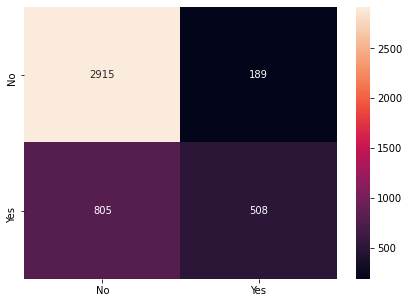

In [66]:
cm = metrics.confusion_matrix(Y_test,Y_test_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')


In [67]:
print(classification_report(Y_test, Y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3104
           1       0.73      0.39      0.51      1313

    accuracy                           0.77      4417
   macro avg       0.76      0.66      0.68      4417
weighted avg       0.77      0.77      0.75      4417



In [68]:
from sklearn.metrics import accuracy_score
acc_dTreeR = accuracy_score(Y_test, Y_test_predict)

In [69]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_dTreeR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.77496


* From the classification report, I am considering precision as we are more concerned about churn yes and Precison is best in this from the report for this model.

* Precision — What percent of your predictions were correct?
* Recall — What percent of the positive cases did you catch?
* F1 score — What percent of positive predictions were correct?

**Ensemble learning: Bagging**

In [71]:
bgcl = BaggingClassifier(base_estimator = dTree, n_estimators=50, random_state = 1)
bgcl.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [72]:
Y_train_predict_bgcl = bgcl.predict(X_train)
Y_test_predict_bgcl = bgcl.predict(X_test)

In [73]:
bgcl.score(X_train,Y_train)

0.9976238968092329

In [74]:
bgcl.score(X_test,Y_test)

0.8317862802807335

* From the above train and test score, I can conclude that Bagging model is better than Decison tree model

* Confusion Matrix for Bagging model

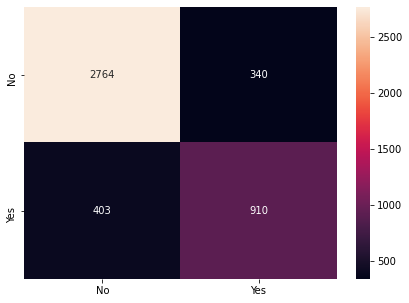

In [75]:
cm = metrics.confusion_matrix(Y_test,Y_test_predict_bgcl, labels = [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')

In [76]:
print(classification_report(Y_test, Y_test_predict_bgcl))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3104
           1       0.73      0.69      0.71      1313

    accuracy                           0.83      4417
   macro avg       0.80      0.79      0.80      4417
weighted avg       0.83      0.83      0.83      4417



In [77]:
acc_bgcl = accuracy_score(Y_test, Y_test_predict_bgcl)

In [78]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_bgcl]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,accuracy
0,Decision Tree,0.774960
0,Bagging,0.831786


* From the classification report, Bagging model is also having precision that performs better in predicting the churn yes category

**Ensemle Learning - Ada Boosting: It uses simple tree**

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=1)

In [81]:
Y_train_predict_abcl = abcl.predict(X_train)
Y_test_predict_abcl = abcl.predict(X_test)

In [82]:
print(abcl.score(X_train,Y_train))

0.7854718262050238


In [83]:
print(abcl.score(X_test,Y_test))

0.7858274847181345


* From the above, test and train scores of Adaboost model is having minimum difference from the bagging and decision tree model. Considering this as the best model till now.

**Confusion matrix for AdaBoost model**

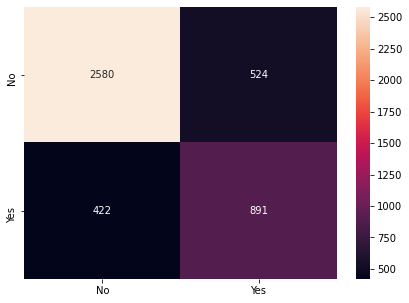

In [84]:
cm = metrics.confusion_matrix(Y_test,Y_test_predict_abcl, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                        columns = [i  for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [86]:
print(classification_report(Y_test, Y_test_predict_abcl))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3104
           1       0.63      0.68      0.65      1313

    accuracy                           0.79      4417
   macro avg       0.74      0.75      0.75      4417
weighted avg       0.79      0.79      0.79      4417



In [87]:
acc_abcl = accuracy_score(Y_test, Y_test_predict_abcl)

In [89]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': [acc_abcl]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

resultsDf


,Method,accuracy
0,Decision Tree,0.774960
0,Bagging,0.831786
0,AdaBoost,0.785827
0,AdaBoost,0.785827


**Ensemble Learning - Gradient boosting: It uses complex tree to get good result**

In [90]:
from sklearn.ensemble import GradientBoostingClassifier


In [91]:
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)


In [92]:
gbcl.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
Y_train_predict_gbcl = gbcl.predict(X_train)
Y_test_predict_gbcl = gbcl.predict(X_test)

In [95]:
print(gbcl.score(X_train,Y_train))
print(gbcl.score(X_test,Y_test))

0.8214528173794976
0.8025809372877518


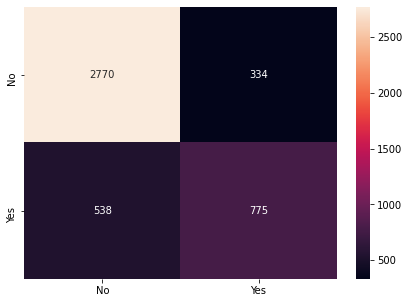

In [96]:
cm = metrics.confusion_matrix(Y_test,Y_test_predict_gbcl, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                        columns = [i  for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_test_predict_gbcl))
print(accuracy_score(Y_train,Y_train_predict_gbcl))

0.8025809372877518
0.8214528173794976


In [98]:
print(classification_report(Y_test, Y_test_predict_gbcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3104
           1       0.70      0.59      0.64      1313

    accuracy                           0.80      4417
   macro avg       0.77      0.74      0.75      4417
weighted avg       0.80      0.80      0.80      4417



In [99]:
acc_gbcl = accuracy_score(Y_test, Y_test_predict_gbcl)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [acc_gbcl]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

resultsDf

,Method,accuracy
0,Decision Tree,0.774960
0,Bagging,0.831786
0,AdaBoost,0.785827
0,AdaBoost,0.785827
0,Gradient Boosting,0.802581


**Ensemble - Random Forest Classifier**

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=123, max_features = 12)
rfcl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [102]:
Y_train_predict_rfcl = rfcl.predict(X_train)
Y_test_predict_rfcl = rfcl.predict(X_test)

In [103]:
print(rfcl.score(X_train,Y_train))
print(rfcl.score(X_test,Y_test))

0.9976238968092329
0.8306542902422459


* RandomForest model seems to be overfit

* Confusion Matrix

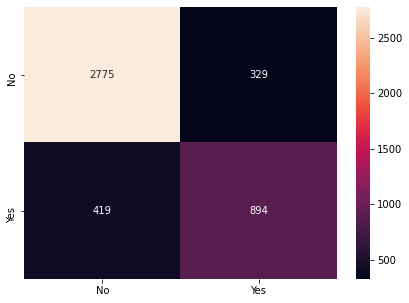

In [104]:
cm = metrics.confusion_matrix(Y_test,Y_test_predict_rfcl, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                        columns = [i  for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [105]:
print(classification_report(Y_test, Y_test_predict_rfcl))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3104
           1       0.73      0.68      0.71      1313

    accuracy                           0.83      4417
   macro avg       0.80      0.79      0.79      4417
weighted avg       0.83      0.83      0.83      4417



In [106]:
acc_rfcl = accuracy_score(Y_test, Y_test_predict_rfcl)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_rfcl]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

resultsDf

,Method,accuracy
0,Decision Tree,0.774960
0,Bagging,0.831786
0,AdaBoost,0.785827
0,AdaBoost,0.785827
0,Gradient Boosting,0.802581
0,Random Forest,0.830654


**Bagging is having Highest accuracy. Therefore, Bagging model is the best one**

**Hyperparameter tuning for Bagging model**

**Bagging model has **
* base estimators : decision tree
* n_estimators : let say n. So, I am going to hypertune this feature to get the best result.


In [107]:
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import cross_val_score
    from numpy import mean
    from numpy import std

In [108]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 150, 200]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models

In [110]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [111]:
models = get_models()
results, names = list(), list()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, Y)
	# store the results
	results.append(scores)
	names.append(name)
 	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.866 (0.015)
>50 0.875 (0.011)
>100 0.877 (0.013)
>150 0.877 (0.013)
>200 0.878 (0.011)


* Considering 50 as best because after that accuracy almost flatten.

In [112]:
import pickle
# save the model to disk
filename = 'bgcl_model.sav'
pickle.dump(bgcl, open(filename, 'wb'))

**7. Conclusion and improvisation**
* Write your conclusion on the results.
* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
telecom operator to perform a better data analysis in future.

# Conclusion:

Bagging model is having highest accuracy with n_estimators 50.


**Suggestion**
* Quality: Data is good as it does not have many missing value(only 11 rows out of 7043)
* Quantity: is good
* Variety: Variety is ok as data is consistent.  
* Veracity feature measures the accuracy of data and its potential use for analysis. Here data is accurate and good for analysis.
* Visualising: Visualising data is about representing key information and knowledge more instinctively and effectively through using different visual formats such as in a pictorial or graphical layout This data has a good visualising power.
* Class Imbalance issue is there. For better analysis, this issue of class Imbalance should be taken care in future.